### Full Name : Radin Cheraghi
### Student Number : 401105815
___

# Phase 0: Intro

In this assignment, you will implement SVM (Support Vector Machines) for classification and get familier with different kernel functions.

we are using a dataset to predict high risk of heart failure based on multiple features.

Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Phase 1: Data Processing

Load the ```heart.csv``` dataset as a dataframe.


In [2]:
df = pd.read_csv('heart 2.csv')

Show the top rows of the dataframe and the number of rows in the dataframe.

In [3]:
# show top rows of the dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# show shape of dataframe
df.shape

(918, 12)

Check for missing values.

In [5]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Encode categorical coloumns.

In [6]:
# Use one hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


Plot the Heatmap to see the correlations between features.

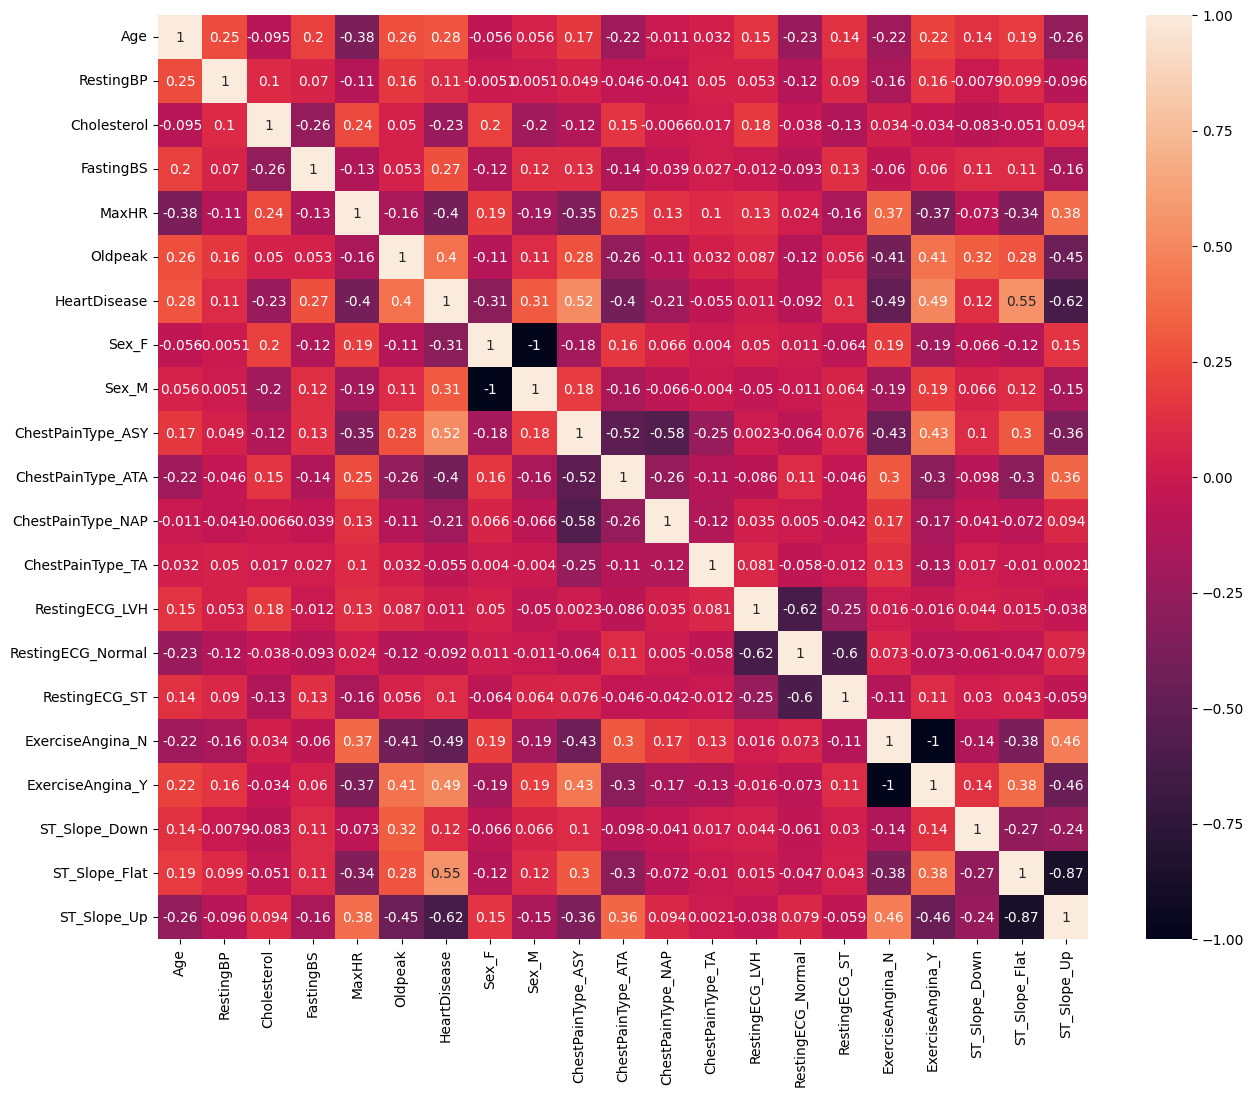

In [7]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cbar=True)
plt.show()

Split data to features and labels. The ```HeartDisease``` column is our target variable. Scale the data using ```StandardScaler```

In [10]:
# split data to features and labels
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']
X = X.to_numpy()
y = y.to_numpy()

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now split data to train, validation and test parts. 70% of data should be used for train, 15% for validation and 15% for test.

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=42)

# Phase 2: Training and Evaluation

Now we will implement the SVM algorithm using Python. Here we will use the Heart Failure Prediction Dataset to understand the Support Vector Machine Algorithm.

Using ```SVC()``` function from ```sklearn.svm``` library fit SVM model on train data.

In [67]:
# use SVC() and train on train data
model = SVC()
model.fit(X_train, y_train)

SVC()

Print model accuracy on both test and validation data.

In [68]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy {val_accuracy}')

Test Accuracy: 0.8985507246376812
Validation Accuracy 0.8913043478260869


Plot confusion matrix for ```Actual Positive```, ```Actual Negative```, ```Predict Positive```, and ```Predict Negative``` measurements of the predicted lables.

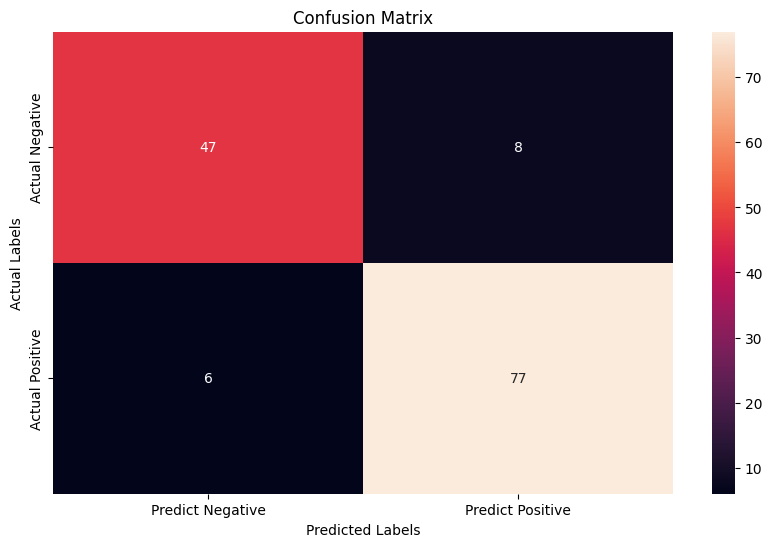

In [15]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Predict Negative', 'Predict Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

Now implement an SVM from scratch without using ```sklearn.svm``` library. You can complete the following ```MySVM``` class.

In [96]:
class MySVM:
    """
    Support Vector Machine (SVM) classifier using a linear kernel and subgradient descent optimization.

    Attributes:
        learning_rate (float): The learning rate for gradient descent.
        lambda_param (float): The regularization parameter (often denoted as lambda or 1/C).
        n_iters (int): The number of iterations for the gradient descent.
        w (numpy.ndarray): The weight vector of the SVM model.
        b (float): The bias term of the SVM model.

    Methods:
        fit(X, y):
            Trains the SVM model using the provided training data.
        predict(X):
            Predicts the class labels for the provided test data.
    """

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        Initializes the SVM with the given hyperparameters.

        input:
            learning_rate (float): The learning rate for gradient descent. Default is 0.001.
            lambda_param (float): The regularization parameter to prevent overfitting. Default is 0.1.
            n_iters (int): The number of iterations for the gradient descent. Default is 1000.
        """
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Trains the SVM model using the provided training data.

        input:
            X (numpy.ndarray): Training data of shape (n_samples, n_features).
            y (numpy.ndarray): True labels for the training data of shape (n_samples,).

        The method converts labels to {-1, 1} and performs gradient descent to optimize the weights and bias.
        """
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Predicts the class labels for the provided test data.

        input:
            X (numpy.ndarray): Test data of shape (n_samples, n_features).

        output:
            numpy.ndarray: Predicted class labels of shape (n_samples,).

        The method calculates the decision function and returns the sign of the result.
        """
        linear_output = np.dot(X, self.w) - self.b
        return np.where(linear_output <= 0, 0, 1)



Fit your model to the train data for multiple value of lambda and test your results.

In [99]:
# train model with multiple hyperparametrs and choose the best on based on validation accuracy
lambda_params = [0.001, 0.01, 0.1, 1]
best_model = None
best_val_acc = 0

for idx, lambda_param in enumerate(lambda_params):
  model = MySVM(lambda_param=lambda_param)
  model.fit(X_train, y_train)

  y_val_pred = model.predict(X_val)
  val_accuracy = accuracy_score(y_val, y_val_pred)
  print(f'Accuracy  {idx} : {val_accuracy}')

  if val_accuracy > best_val_acc:
    best_model = model
    best_val_acc = val_accuracy

Accuracy  0 : 0.8478260869565217
Accuracy  1 : 0.855072463768116
Accuracy  2 : 0.855072463768116
Accuracy  3 : 0.8695652173913043


Evaluate you model. (accuracy for test should be greater than %85)

In [100]:
# use the best model to compute accuracy on test data.
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8985507246376812


# Phase 4: Different SVM Kernels

In the context of SVMs, a kernel function acts as a mathematical tool that facilitates the resolution of complex classification problems. Kernels enable the transformation of data into a higher-dimensional feature space, where intricate relationships between data points can be more effectively modeled using linear methods. This capability allows SVMs to handle problems with a vast number of dimensions, potentially even infinite dimensions. Kernel functions play a critical role in data classification tasks by enabling the identification of patterns within the data. Notably, they excel at addressing non-linear problems using a linear approach.

Traditionally, SVMs strive to identify a hyperplane (a straight line in higher dimensions) that optimally separates data points belonging to distinct classes. However, for data exhibiting non-linear relationships, this approach may not be feasible, especially as the dimensionality of the data increases. Kernel functions address this limitation by implicitly transforming the data into a higher-dimensional space where a linear separation becomes possible. This phase explores four commonly employed kernel functions used in SVM classification.

first you should implement a function to compute accuracy, balanced accuracy and plot confusion matrix of your trained model using Seaborn.heatmap() function.

In [101]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, balanced_accuracy, cm

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

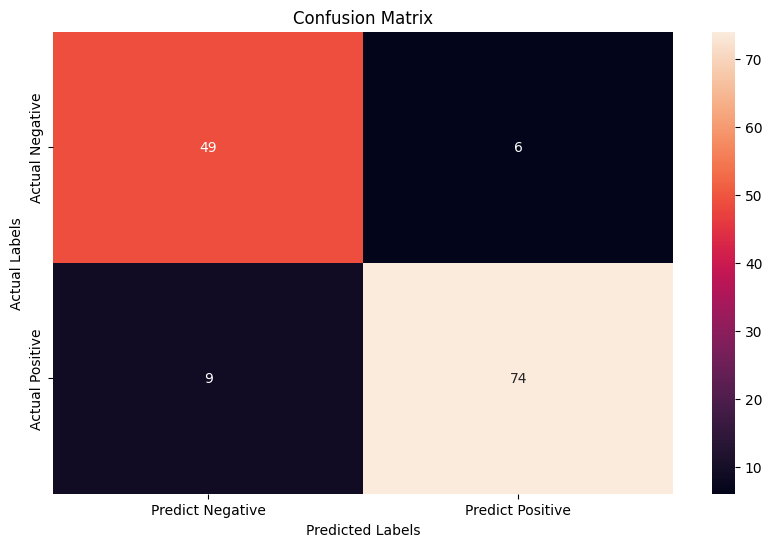

Accuracy: 0.8913043478260869
Balanced Accuracy: 0.8912376779846659


In [104]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, xticklabels=['Predict Negative', 'Predict Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

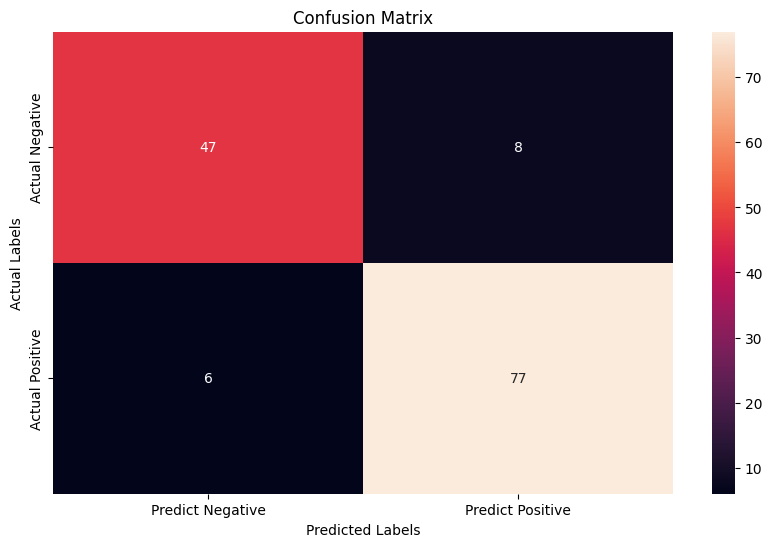

Accuracy: 0.8985507246376812
Balanced Accuracy: 0.8911281489594742


In [105]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, xticklabels=['Predict Negative', 'Predict Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

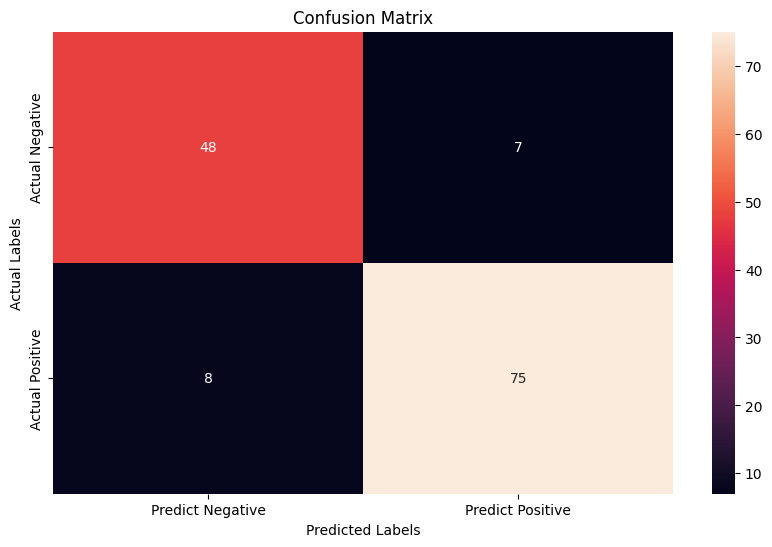

Accuracy: 0.8913043478260869
Balanced Accuracy: 0.888170865279299


In [106]:
svc = SVC(kernel='poly', degree = 3)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, xticklabels=['Predict Negative', 'Predict Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

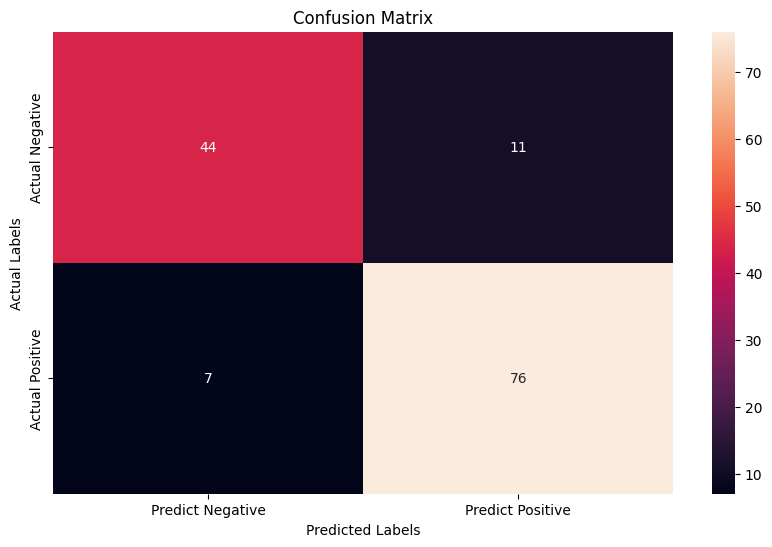

Accuracy: 0.8695652173913043
Balanced Accuracy: 0.8578313253012049


In [107]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy, balanced_accuracy, cm = evaluate(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, xticklabels=['Predict Negative', 'Predict Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

The linear kernel is simple and efficient. It is ideal for separable data or high-dimensional spaces; however, it struggles if the relationship is not linear. The polynomial kernel can be used to model more subtle patterns by considering interactions between attributes. However, it cannot avoid overfitting as easily, and high-order polynomials are computationally expensive. The Gaussian RBF kernel has a high degree of flexibility; it is very good to capture intricate, nonlinear associations in the data, but careful attention must be paid to the values of hyperparameters like gamma, and it is more computationally expensive on larger datasets. Finally, the sigmoid kernel is similar to a neural network activation function, providing medium flexibilities, but due to poor performance and parameter sensitivity, it is less used compared to other kernels like RBF or polynomial. Every one of these kernels has different strengths and weaknesses, and the choice does depend upon the nature of the data and the problem in hand.